In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('datasets/lab6.txt', sep = '\t', header=None)
df.columns = ['X_1', 'X_2', 'Y']
df.head()

,X_1,X_2,Y
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [3]:
n_samples = df.shape[0]
n_samples

373

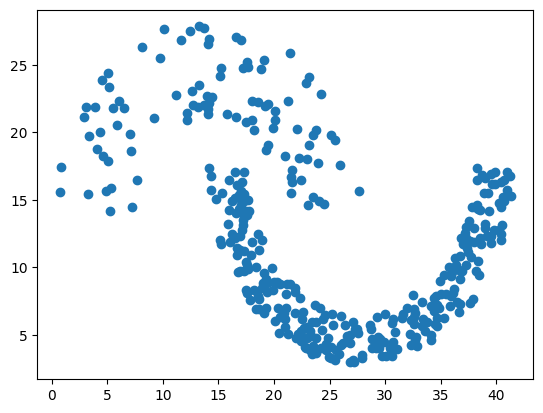

In [4]:
plt.scatter(df['X_1'], df['X_2'])

In [5]:
## making 2 random centroids
a = random.randint(0, df.shape[0])
b = random.randint(0, df.shape[0])
cent_1 = np.array([df['X_1'][a], df['X_2'][a]])
cent_2 = np.array([df['X_1'][b], df['X_2'][b]])
centers = (cent_1, cent_2)
centers

(array([23.75, 20.2 ]), array([18.8, 24.7]))

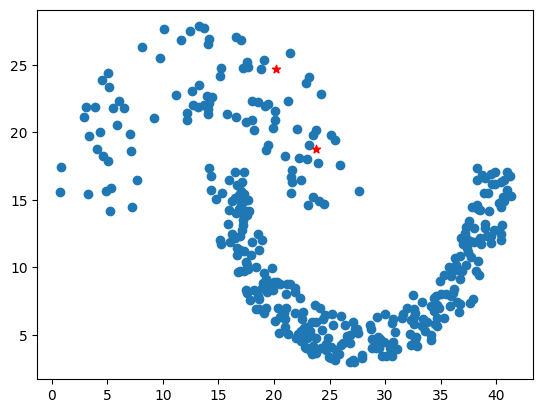

In [6]:
# plotting randomly initialized centroids
plt.scatter(df['X_1'], df['X_2'])
plt.scatter(cent_1,cent_2,marker = '*',c = 'red') 

In [7]:
# k is number of clusters
k = 2

clusters = {}
# making a cluster dictionary to store its center coordinates and nearby points
for i in range(k):
    cluster = {    
        'center' : centers[i],
        'points' : []
    }
    
    clusters[i] = cluster

clusters

{0: {'center': array([23.75, 20.2 ]), 'points': []},
 1: {'center': array([18.8, 24.7]), 'points': []}}

In [8]:
# function to calculate distance between two points
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

# assigning the points to the closest center
def assign_cluster(X_1 , X_2, clusters): # passing the (x, y) coordinates as X_1, X_2
    for idx in range(n_samples):
        dist = []
        curr_x = np.array([X_1[idx], X_2[idx]])

        for i in range(k): # comparing the distance of the point from two centers
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)

        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

    return clusters

# now updating the cluster centers as the mean of the cluster points
def update_clusters(X_1, X_2, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0 : # if the cluster actually have points (not zero)
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            # now empty the cluster points
            clusters[i]['points'] = []

    return clusters

In [9]:
# predicting the point for a cluster
def pred_cluster(X_1, X_2, clusters):
    pred = []
    for i in range(n_samples):
        dist = []
        for j in range(k):
            dist.append(distance(np.array([df['X_1'][i], df['X_2'][i]]), clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [10]:
clusters = assign_cluster(df['X_1'], df['X_2'], clusters)
clusters = update_clusters(df['X_1'], df['X_2'], clusters)
pred = pred_cluster(df['X_1'], df['X_2'], clusters)

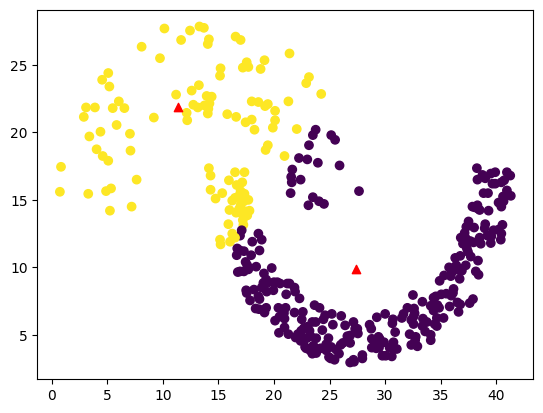

In [11]:
# plotting the clusters
plt.scatter(df['X_1'], df['X_2'],c = pred)
for i in clusters:
    plt.scatter(clusters[i]['center'][0], clusters[i]['center'][1], marker = '^', c ='r')
plt.show()